In [ ]:
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call("pip install -U opencv-python".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/left.jpg".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/right.jpg".split())
    !pip install opencv-contrib-python==3.4.2.17 --force-reinstall

  Using cached https://files.pythonhosted.org/packages/12/32/8d32d40cd35e61c80cb112ef5e8dbdcfbb06124f36a765df98517a12e753/opencv_contrib_python-3.4.2.17-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/73/ef/8967d406f3f85018ceb5efab50431e901683188f1741ceb053efcab26c87/numpy-1.20.2-cp37-cp37m-manylinux2010_x86_64.whl
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2
  Found existing installation: opencv-contrib-python 3.4.2.17
    Uninstalling opencv-contrib-python-3.4.2.17:
      Successfully uninstalled opencv-contrib-python-3.4.2.17


In [ ]:
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

  Using cached https://files.pythonhosted.org/packages/12/32/8d32d40cd35e61c80cb112ef5e8dbdcfbb06124f36a765df98517a12e753/opencv_contrib_python-3.4.2.17-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/73/ef/8967d406f3f85018ceb5efab50431e901683188f1741ceb053efcab26c87/numpy-1.20.2-cp37-cp37m-manylinux2010_x86_64.whl
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2
  Found existing installation: opencv-contrib-python 3.4.2.17
    Uninstalling opencv-contrib-python-3.4.2.17:
      Successfully uninstalled opencv-contrib-python-3.4.2.17


In [ ]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2
figsize = (10,10)
import skimage
from skimage import io

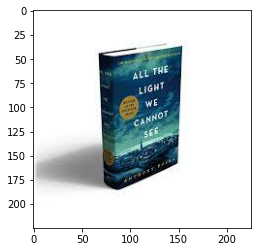

In [ ]:
rgb_l = cv2.cvtColor(cv2.imread('download.jpeg'),cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l,cv2.COLOR_RGB2GRAY)

rgb_r = cv2.cvtColor(cv2.imread('download (1).jpeg'),cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_l,cv2.COLOR_RGB2GRAY)

plt.imshow(rgb_r)
plt.imshow(rgb_l)




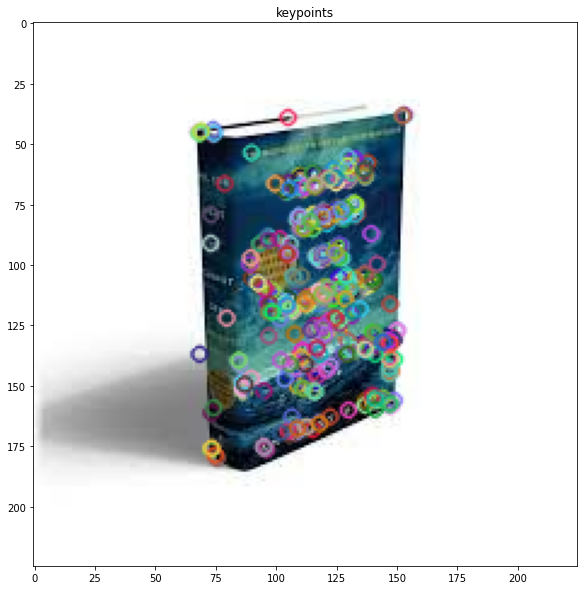

In [ ]:
#use orb if shift is not installed
orb = cv2.ORB_create()

#find the kyepoints and descriptors with chosen feature_extrator
kp_l, desc_l = orb.detectAndCompute(gray_l, None)
kp_r, desc_r = orb.detectAndCompute(gray_l, None)

#kp are key points and desc are descriptor
test_l = cv2.drawKeypoints(rgb_l, kp_l, None)
test_r = cv2.drawKeypoints(rgb_r, kp_r, None)

plt.figure(figsize=figsize)
plt.imshow(test_l)
plt.title("keypoints")
plt.show()

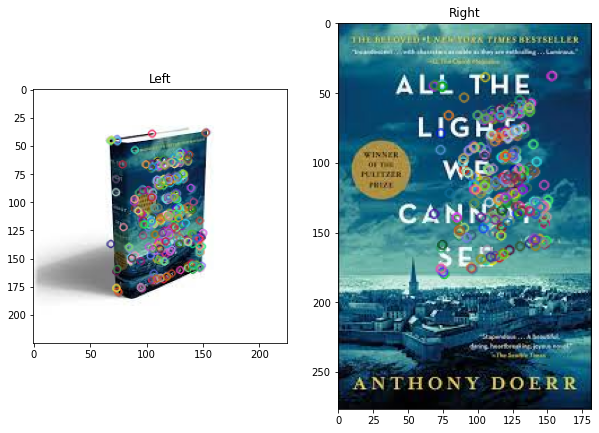

In [ ]:
plt.figure(figsize=figsize)
plt.subplot(1,2,1),plt.imshow(test_l),plt.title('Left')
plt.subplot(1,2,2),plt.imshow(test_r),plt.title('Right')
plt.show()

In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_match = []
for m in matches:
    if m[0].distance/m[1].distance < 0.6:
        good_match.append(m)
good_match_arr = np.asarray(good_match)

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
                                good_match[0:50], None)# flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

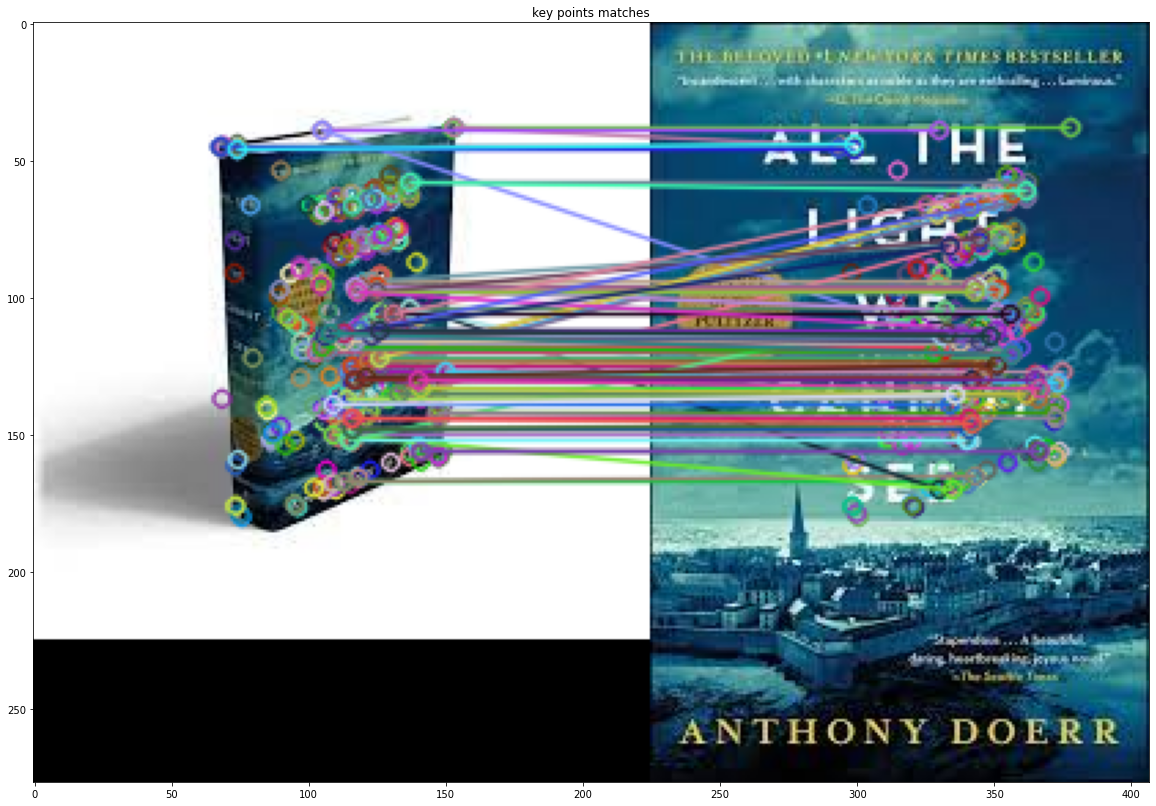

424
424


In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(im_matches)
plt.title("key points matches")
plt.show()
print(len(matches))
print(len(good_match))

SURF


In [ ]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2
figsize = (10,10)
import skimage
from skimage import io

In [ ]:
surf = cv2.xfeatures2d.SURF_create()


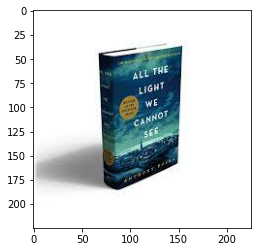

In [ ]:
rgb_l= cv2.cvtColor(cv2.imread('download (1).jpeg'), cv2.COLOR_BGR2RGB)
gray_l=cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)

rgb_r= cv2.cvtColor(cv2.imread('download.jpeg'), cv2.COLOR_BGR2RGB)
gray_r=cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)

plt.imshow(rgb_r)

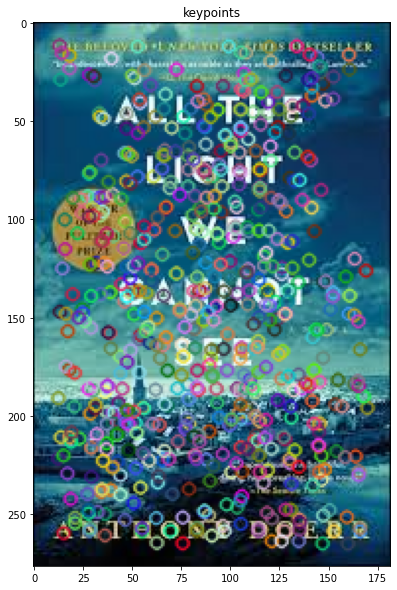

In [ ]:
# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = surf.detectAndCompute(gray_l, None)  #None for mask (for a particular part of an image)
kp_r, desc_r = surf.detectAndCompute(gray_r, None)

#kp are key points and desc are descriptors

test_l = cv2.drawKeypoints(rgb_l, kp_l, None) #flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #None for output image
test_r = cv2.drawKeypoints(rgb_r, kp_r, None)

plt.figure(figsize=figsize)
plt.imshow(test_l)
plt.title("keypoints")
plt.show()

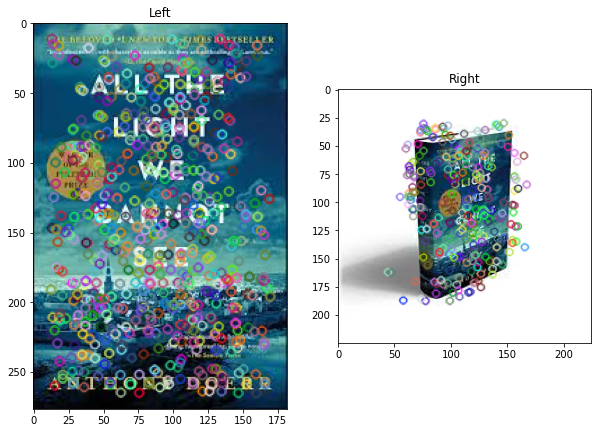

In [ ]:
plt.figure(figsize=figsize)
plt.subplot(1,2,1),plt.imshow(test_l), plt.title('Left')
plt.subplot(1,2,2),plt.imshow(test_r),plt.title('Right')

plt.show()

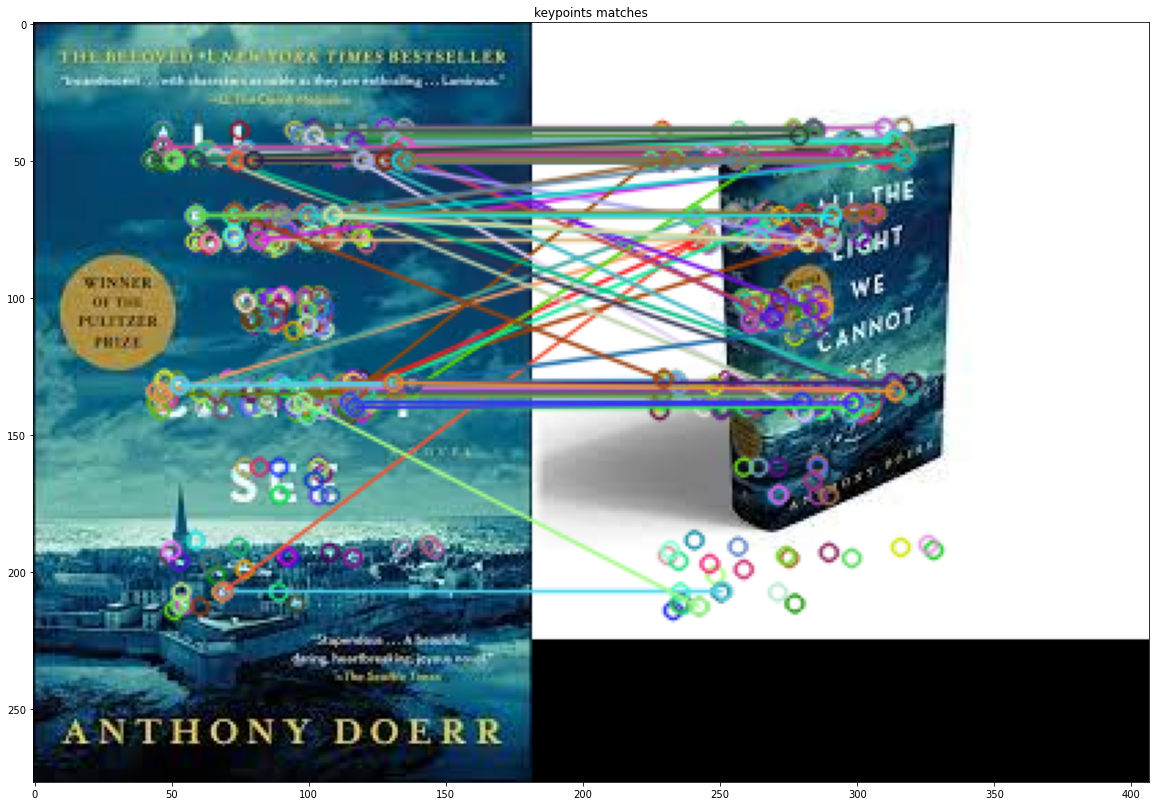

403
403


In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_match = []
for m in matches:
    if m[0].distance/m[1].distance < 0.6:
        good_match.append(m)
good_match_arr = np.asarray(good_match)

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
                                good_match[:50], None)# flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()
print(len(matches))
print(len(good_match))